In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h2>Анализ на текстовия файл с данни за забележителностите</h2> 

In [174]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018


Общ брой снимки на забележителности в наличното множество

In [175]:
len(train_data)

1225029

In [176]:
unique_landmark_ids = train_data.landmark_id.unique()

Общ брой уникални забележителности сред наличните данни

In [177]:
len(unique_landmark_ids)

14952

Проверка за липсващи данни

In [178]:
train_data.isnull().sum().sort_values(ascending = False)

landmark_id    0
url            0
id             0
dtype: int64

Привидно нямаме липсващи данни. Нека направим и проверка за реално липсващи <b>landmark_id</b>

In [179]:
train_data.loc[train_data.landmark_id == 'None', 'landmark_id'].count()

12530

Премахваме тези невалидни записи преди да продължим работа.

In [180]:
train_data = train_data.drop(train_data[train_data.landmark_id == 'None'].index)

In [182]:
train_data.shape

(1212499, 3)

In [184]:
train_data = train_data.head(10000)

Визуализираме дистрибуцията на появяване на различните забележителности сред данните.

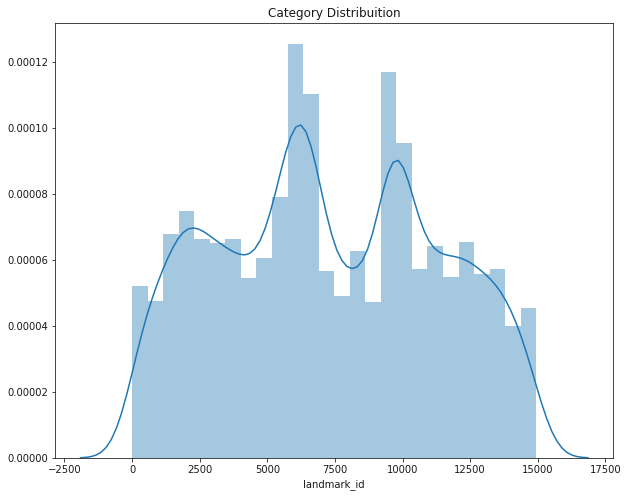

In [185]:
train_data["landmark_id"] = pd.to_numeric(train_data["landmark_id"])
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

Нека разгледаме за колко забележителности разполагаме с по-малко от 10 примера

In [186]:
(train_data['landmark_id'].value_counts() <= 10).sum()

3385

Премахваме ги от данните понеже трениране на модел с толкова малко тренировъчни примери би имал лоша производителност.

In [187]:
counts = train_data.landmark_id.value_counts()
train_data = train_data.loc[train_data.landmark_id.isin(counts[counts > 10].index), :]

In [188]:
train_data.shape

(3291, 3)

Нека разгледаме сайтовете от които идват обработваните снимки.

In [189]:
# Extract site_names for train data
site_list = list()
for path in train_data['url']:
    site_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = site_list

In [190]:
train_data.head(10)

,id,url,landmark_id,site_name
5,056708de792326b9,https://lh3.googleusercontent.com/-nbz_XT1dGz4...,5046,lh3.googleusercontent.com
6,6ae1e206c579f649,https://lh6.googleusercontent.com/-onL5-pK9nZI...,5554,lh6.googleusercontent.com
7,7b1e476a7c89bb34,http://lh5.ggpht.com/-3GWjPriaA9g/Sg3e_S0qEgI/...,12220,lh5.ggpht.com
11,675e1bb968bc5150,http://lh3.ggpht.com/-3bysCvkJIBs/Tnf_HqJhFaI/...,5554,lh3.ggpht.com
12,192333daaf6119cf,https://lh5.googleusercontent.com/-eoC653AtqLs...,10045,lh5.googleusercontent.com
20,d84e1ac70338c92e,https://lh3.googleusercontent.com/-nGAwumqrkI0...,13526,lh3.googleusercontent.com
21,beee65146315cae8,http://mw2.google.com/mw-panoramio/photos/medi...,8274,mw2.google.com
23,e75ec07b7b4c945f,http://lh6.ggpht.com/-MbCfKSsUTLg/RjyNT-6K2OI/...,6051,lh6.ggpht.com
24,9f1569a7c48423d7,http://lh6.ggpht.com/-g_6dtHyMEmA/TB5_ST1SOtI/...,4644,lh6.ggpht.com
27,59be77be1d452a4f,https://lh5.googleusercontent.com/--Q3SMs25zX8...,1472,lh5.googleusercontent.com


In [191]:
# Occurrence of site in decreasing order(Top categories)
site_occurrences = pd.DataFrame(train_data.site_name.value_counts())
site_occurrences.reset_index(inplace=True)
site_occurrences.columns = ['site_name','count']
site_occurrences

,site_name,count
0,lh3.googleusercontent.com,569
1,lh4.googleusercontent.com,555
2,lh6.googleusercontent.com,480
3,lh5.googleusercontent.com,471
4,lh5.ggpht.com,277
5,lh3.ggpht.com,275
6,lh6.ggpht.com,264
7,lh4.ggpht.com,240
8,mw2.google.com,135
9,static.panoramio.com,25


Понеже сайтът <b>Panoramio</b> е продукт на Google който вече не се използва url-ите от него не са валидни. Премахваме ги от данните

In [192]:
train_data = train_data[~train_data.site_name.str.contains("panoramio")]

In [193]:
train_data.shape

(3266, 4)

In [194]:
# Occurrence of site in decreasing order after Panoramio is removed
site_occurrences = pd.DataFrame(train_data.site_name.value_counts())
site_occurrences.reset_index(inplace=True)
site_occurrences.columns = ['site_name','count']

,site_name,count
0,lh3.googleusercontent.com,569
1,lh4.googleusercontent.com,555
2,lh6.googleusercontent.com,480
3,lh5.googleusercontent.com,471
4,lh5.ggpht.com,277
5,lh3.ggpht.com,275
6,lh6.ggpht.com,264
7,lh4.ggpht.com,240
8,mw2.google.com,135


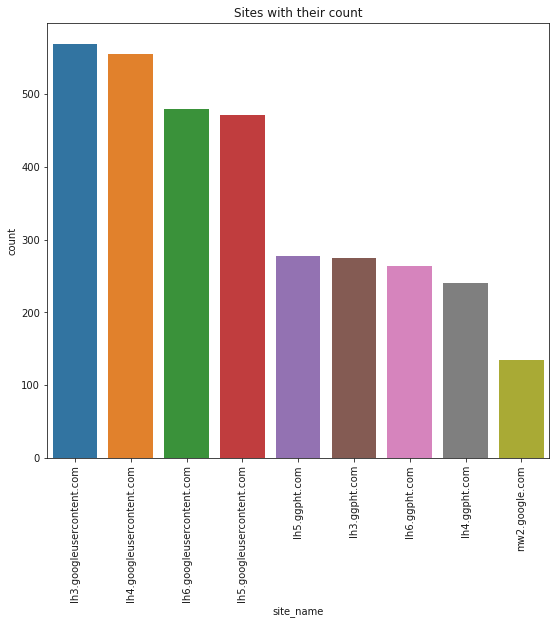

In [195]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=site_occurrences,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [197]:
train_data=train_data.drop(columns="site_name")

Записваме почистените данни в нов csv файл за да продължим към същинската част на речението.

In [199]:
train_data.to_csv("train_data_cleared.csv",index=False)

<h2> Наблюдения върху снимковия материал </h2>
Нека сега разгледаме и самите снимки, които сме получили и направим наблюдения върху тях.

In [212]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 150px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join(["<img style='" + img_style + "' src='" + u + "' />" for _, u in urls.head(12).iteritems()])
    display(HTML(images_list))

In [216]:
category = train_data['landmark_id'].value_counts().keys()[5]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")
print(category)

6651


С категория 6651 виждаме някои особености на данните
<ul>
<li> Снимките често съдържат портретни снимки на хора на преден план и самата забележителност не се вижда добре </li>
<li> Някои снимки съдържат и надписи, които биха могли да повлияят на модела </li>
</ul>